In [2]:
import pandas as pd

df = pd.read_csv('HR_data.csv')

df_encoded = pd.get_dummies(df, columns=['Round', 'Phase', 'Cohort'])

df.head()

,measurement,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,0,77.965186,78.00,3.345290,73.23,83.37,22924.945,round_3,phase3,1,1,1,D1_1
1,1,70.981097,70.57,2.517879,67.12,78.22,21930.400,round_3,phase2,1,1,5,D1_1
2,2,73.371959,73.36,3.259569,67.88,80.22,21647.085,round_3,phase1,1,1,0,D1_1
3,3,78.916822,77.88,4.054595,72.32,84.92,25258.905,round_2,phase3,1,1,1,D1_1
4,4,77.322226,74.55,6.047603,70.52,90.15,23890.565,round_2,phase2,1,1,5,D1_1


In [3]:
correlation_matrix = df_encoded[['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']].corr()

correlation_matrix

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC
HR_Mean,1.000000,0.954099,0.194957,0.762771,0.634759,0.650404
HR_Median,0.954099,1.000000,-0.035303,0.797369,0.417964,0.592488
HR_std,0.194957,-0.035303,1.000000,-0.362492,0.840954,0.200859
HR_Min,0.762771,0.797369,-0.362492,1.000000,0.153465,0.424584
HR_Max,0.634759,0.417964,0.840954,0.153465,1.000000,0.470225
HR_AUC,0.650404,0.592488,0.200859,0.424584,0.470225,1.000000


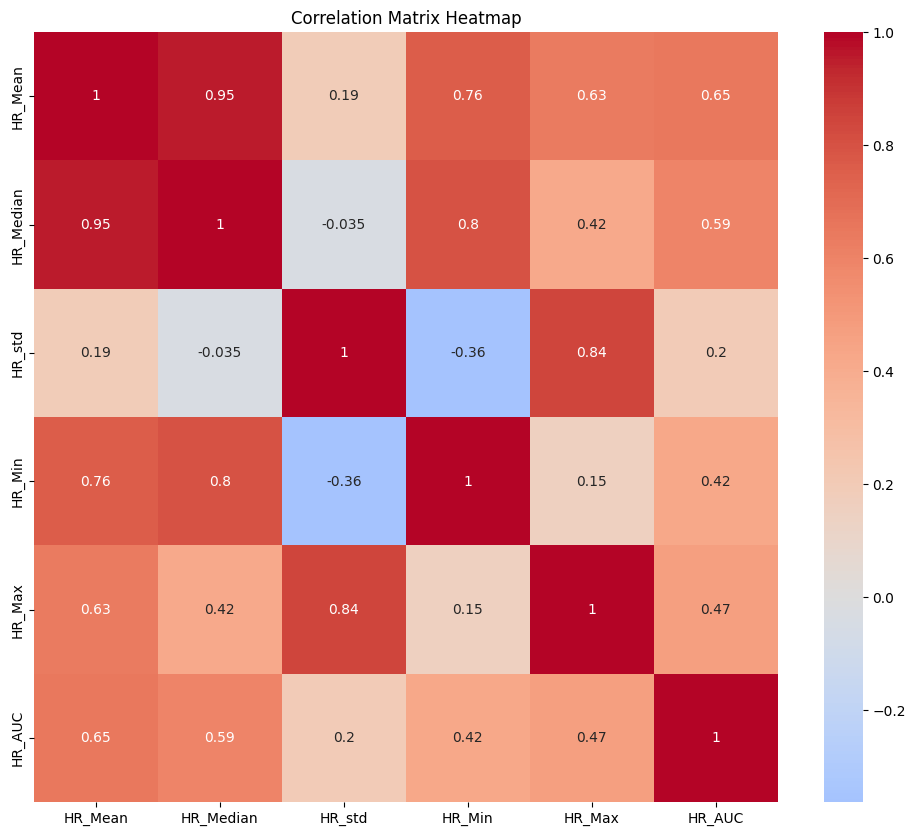

Highly correlated pairs (above threshold of 0.8):
[('HR_Median', 'HR_Mean'), ('HR_Max', 'HR_std')]
Removed features: {'HR_std', 'HR_Mean'}
Remaining features: Index(['measurement', 'HR_Median', 'HR_Min', 'HR_Max', 'HR_AUC', 'Round',
       'Phase', 'Individual', 'Puzzler', 'Frustrated', 'Cohort'],
      dtype='object')


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

threshold = 0.8
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            highly_correlated_pairs.append((colname1, colname2))

print("Highly correlated pairs (above threshold of 0.8):")
print(highly_correlated_pairs)

features_to_remove = set()
for pair in highly_correlated_pairs:
    feature1, feature2 = pair
    features_to_remove.add(feature2) 

df_reduced = df.drop(columns=features_to_remove)
print(f"Removed features: {features_to_remove}")
print("Remaining features:", df_reduced.columns)

In [5]:
spearman_correlation_matrix = df_encoded[['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']].corr(method='spearman')

spearman_correlation_matrix

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC
HR_Mean,1.000000,0.953177,0.148974,0.770131,0.667152,0.772702
HR_Median,0.953177,1.000000,-0.010246,0.786641,0.499372,0.718646
HR_std,0.148974,-0.010246,1.000000,-0.355812,0.709051,0.186942
HR_Min,0.770131,0.786641,-0.355812,1.000000,0.261150,0.508444
HR_Max,0.667152,0.499372,0.709051,0.261150,1.000000,0.573245
HR_AUC,0.772702,0.718646,0.186942,0.508444,0.573245,1.000000


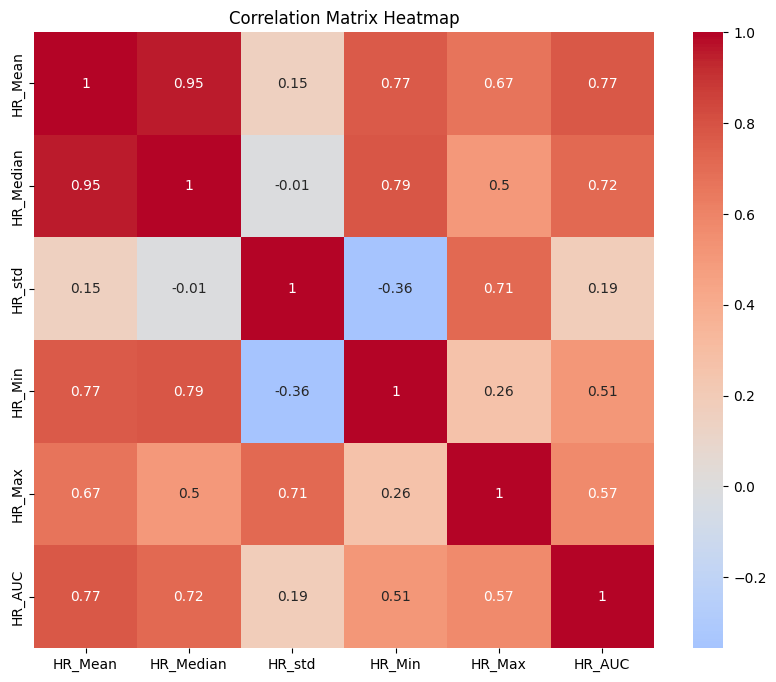

Highly correlated pairs (above threshold of 0.8):
[('HR_Median', 'HR_Mean')]
Removed features: {'HR_Mean'}
Remaining features: Index(['measurement', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC',
       'Round', 'Phase', 'Individual', 'Puzzler', 'Frustrated', 'Cohort'],
      dtype='object')


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


threshold = 0.8
highly_correlated_pairs = []

for i in range(len(spearman_correlation_matrix.columns)):
    for j in range(i):
        if abs(spearman_correlation_matrix.iloc[i, j]) > threshold:
            colname1 = spearman_correlation_matrix.columns[i]
            colname2 = spearman_correlation_matrix.columns[j]
            highly_correlated_pairs.append((colname1, colname2))

print("Highly correlated pairs (above threshold of 0.8):")
print(highly_correlated_pairs)


features_to_remove = set()
for pair in highly_correlated_pairs:
    feature1, feature2 = pair
    features_to_remove.add(feature2)  

df_reduced = df.drop(columns=features_to_remove)
print(f"Removed features: {features_to_remove}")
print("Remaining features:", df_reduced.columns)

In [9]:

spearman_correlation_with_target = df_encoded[['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC', 'Frustrated']].corr(method='spearman')

spearman_correlation_with_target

,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Frustrated
HR_Mean,1.000000,0.953177,0.148974,0.770131,0.667152,0.772702,0.123036
HR_Median,0.953177,1.000000,-0.010246,0.786641,0.499372,0.718646,0.089125
HR_std,0.148974,-0.010246,1.000000,-0.355812,0.709051,0.186942,0.179403
HR_Min,0.770131,0.786641,-0.355812,1.000000,0.261150,0.508444,-0.002497
HR_Max,0.667152,0.499372,0.709051,0.261150,1.000000,0.573245,0.180681
HR_AUC,0.772702,0.718646,0.186942,0.508444,0.573245,1.000000,0.168586
Frustrated,0.123036,0.089125,0.179403,-0.002497,0.180681,0.168586,1.000000


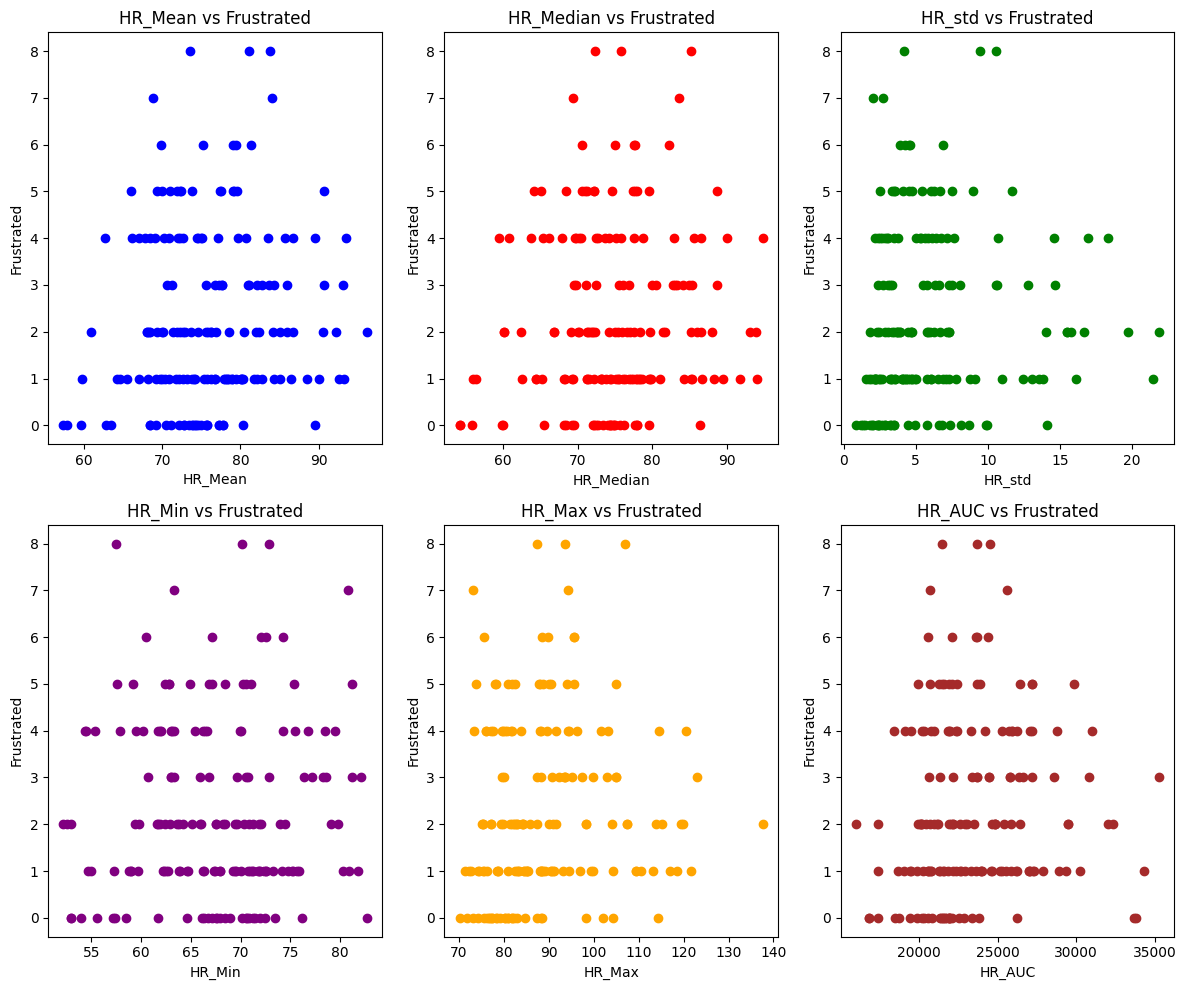

In [11]:

plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.scatter(df_encoded['HR_Mean'], df_encoded['Frustrated'], color='blue')
plt.xlabel('HR_Mean')
plt.ylabel('Frustrated')
plt.title('HR_Mean vs Frustrated')

plt.subplot(2, 3, 2)
plt.scatter(df_encoded['HR_Median'], df_encoded['Frustrated'], color='red')
plt.xlabel('HR_Median')
plt.ylabel('Frustrated')
plt.title('HR_Median vs Frustrated')

plt.subplot(2, 3, 3)
plt.scatter(df_encoded['HR_std'], df_encoded['Frustrated'], color='green')
plt.xlabel('HR_std')
plt.ylabel('Frustrated')
plt.title('HR_std vs Frustrated')

plt.subplot(2, 3, 4)
plt.scatter(df_encoded['HR_Min'], df_encoded['Frustrated'], color='purple')
plt.xlabel('HR_Min')
plt.ylabel('Frustrated')
plt.title('HR_Min vs Frustrated')

plt.subplot(2, 3, 5)
plt.scatter(df_encoded['HR_Max'], df_encoded['Frustrated'], color='orange')
plt.xlabel('HR_Max')
plt.ylabel('Frustrated')
plt.title('HR_Max vs Frustrated')

plt.subplot(2, 3, 6)
plt.scatter(df_encoded['HR_AUC'], df_encoded['Frustrated'], color='brown')
plt.xlabel('HR_AUC')
plt.ylabel('Frustrated')
plt.title('HR_AUC vs Frustrated')

plt.tight_layout()
plt.show()


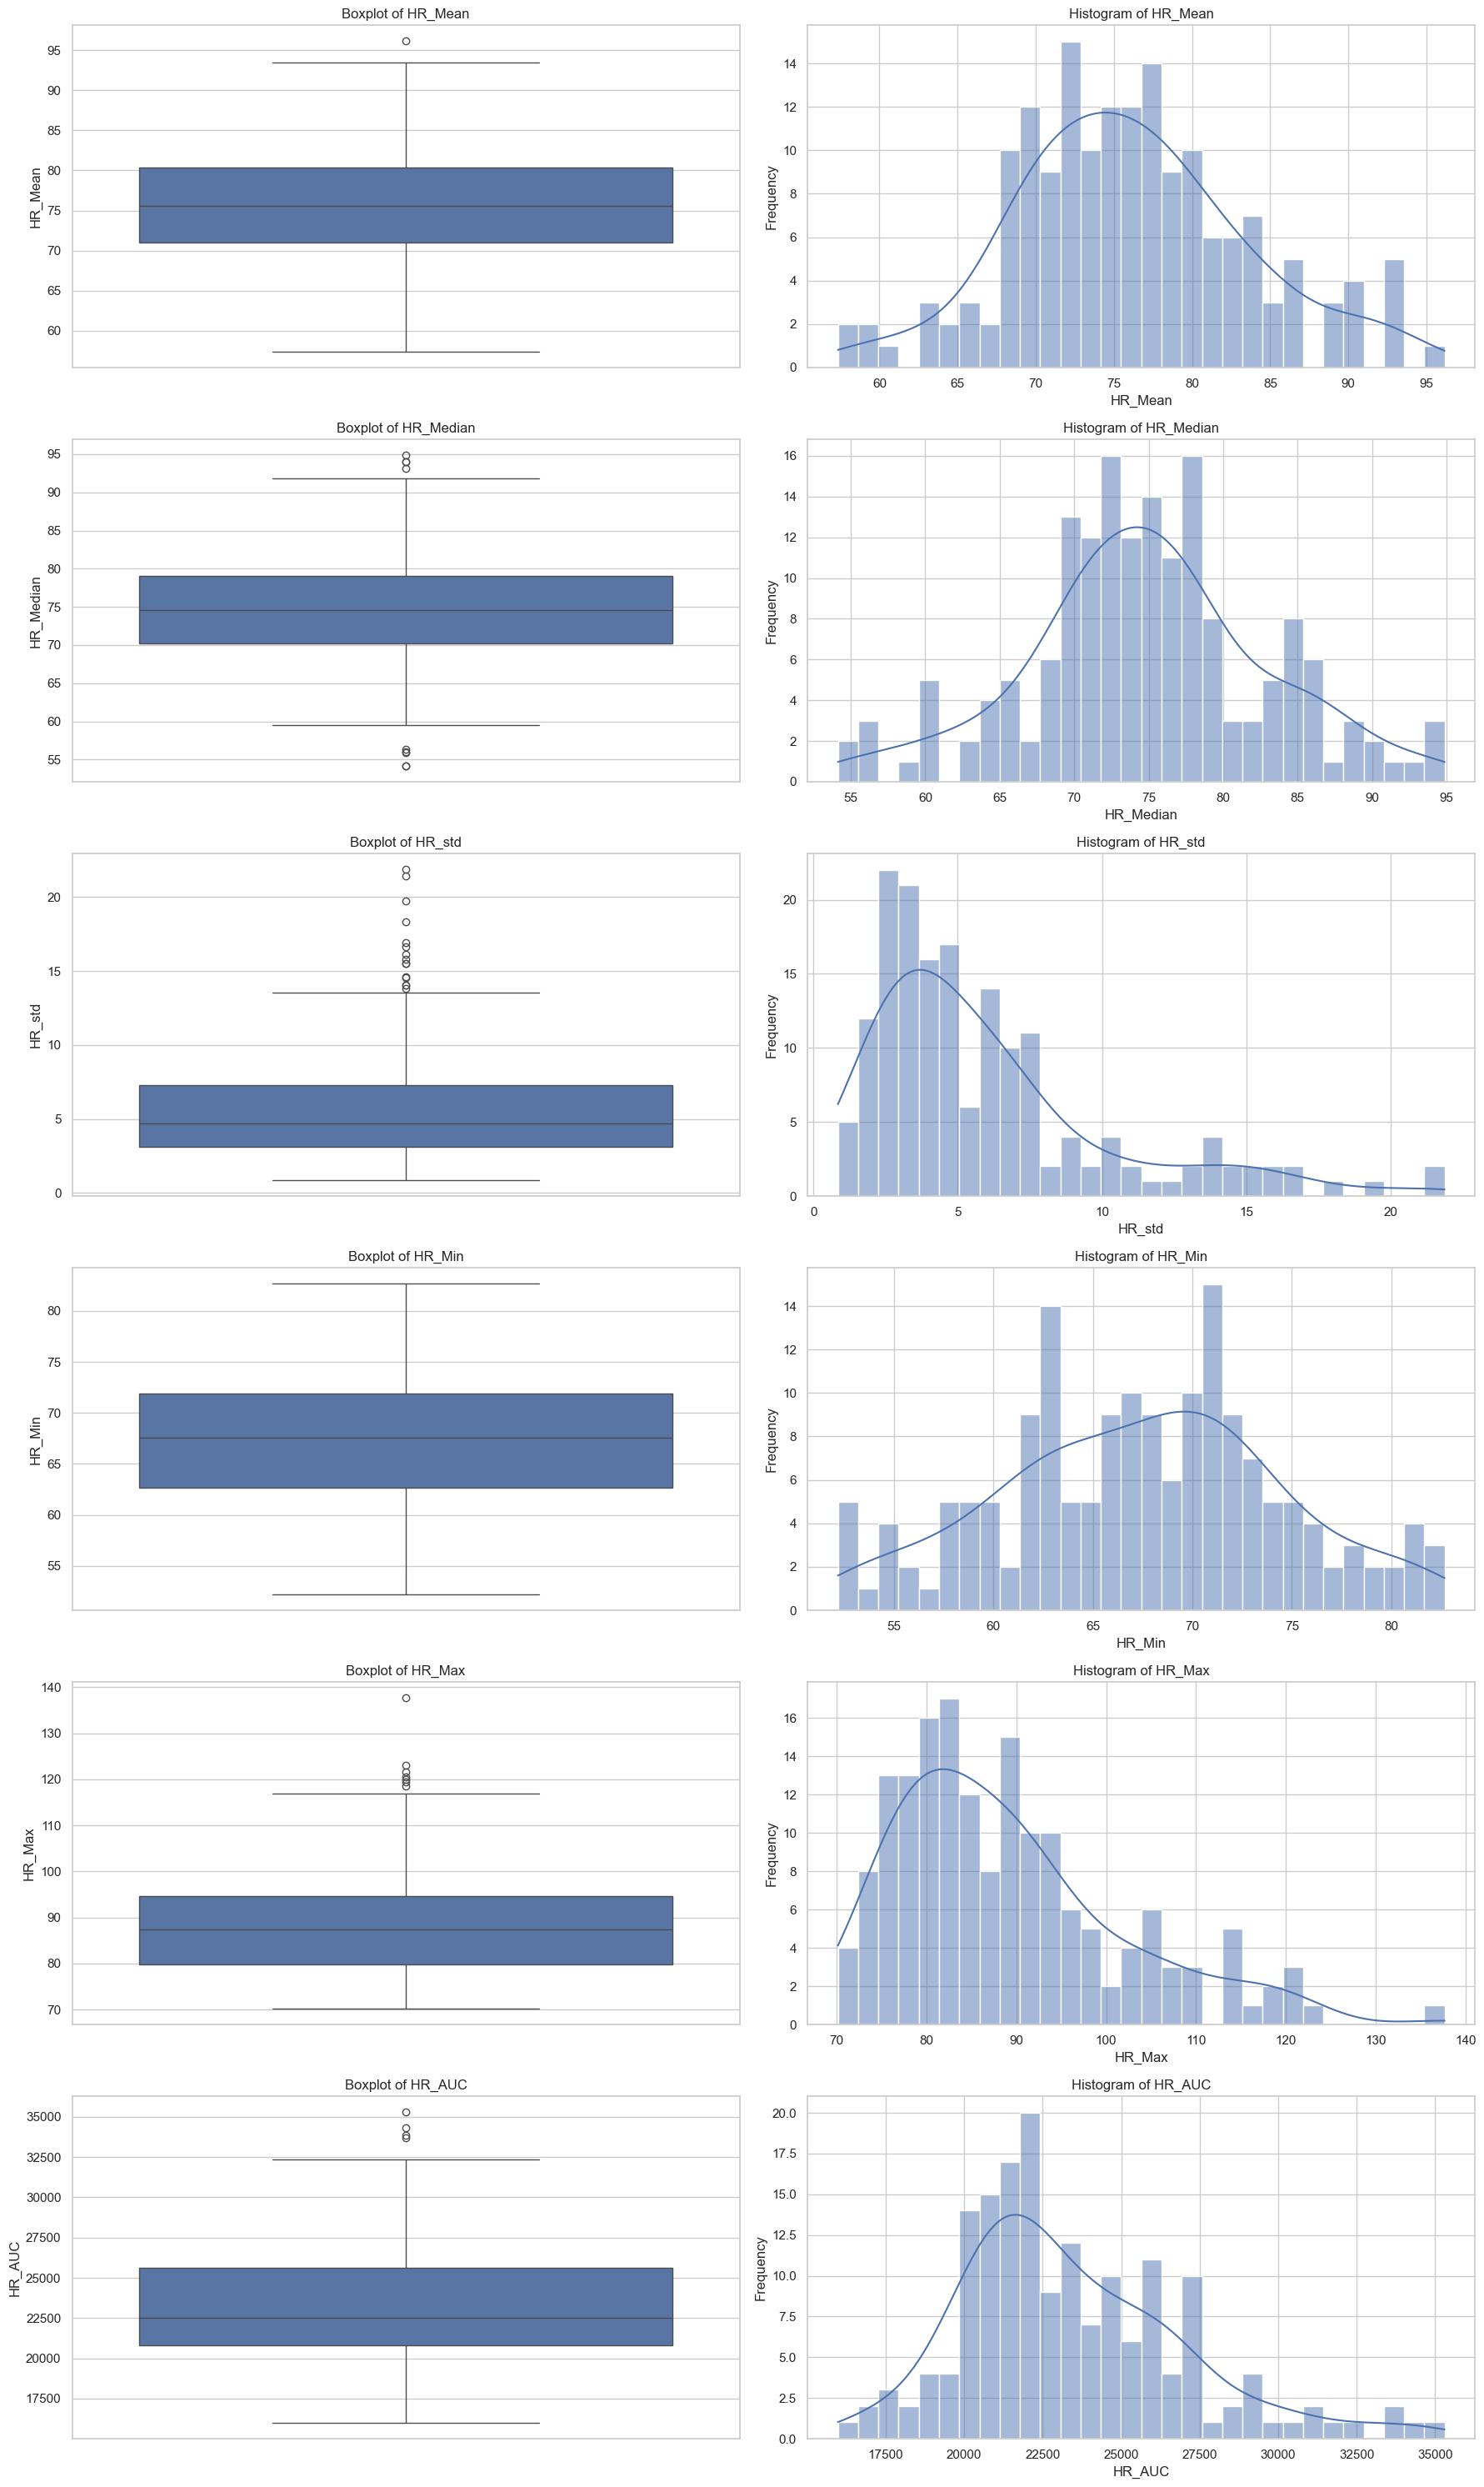

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

HR_metrics = df_encoded[['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']]

sns.set(style="whitegrid")

fig, axs = plt.subplots(6, 2, figsize=(18, 30))

for i, column in enumerate(HR_metrics.columns):
    sns.boxplot(y=HR_metrics[column], ax=axs[i, 0])
    axs[i, 0].set_title(f'Boxplot of {column}')
    axs[i, 0].set_ylabel(column)
    
    sns.histplot(HR_metrics[column], bins=30, kde=True, ax=axs[i, 1])
    axs[i, 1].set_title(f'Histogram of {column}')
    axs[i, 1].set_xlabel(column)
    axs[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

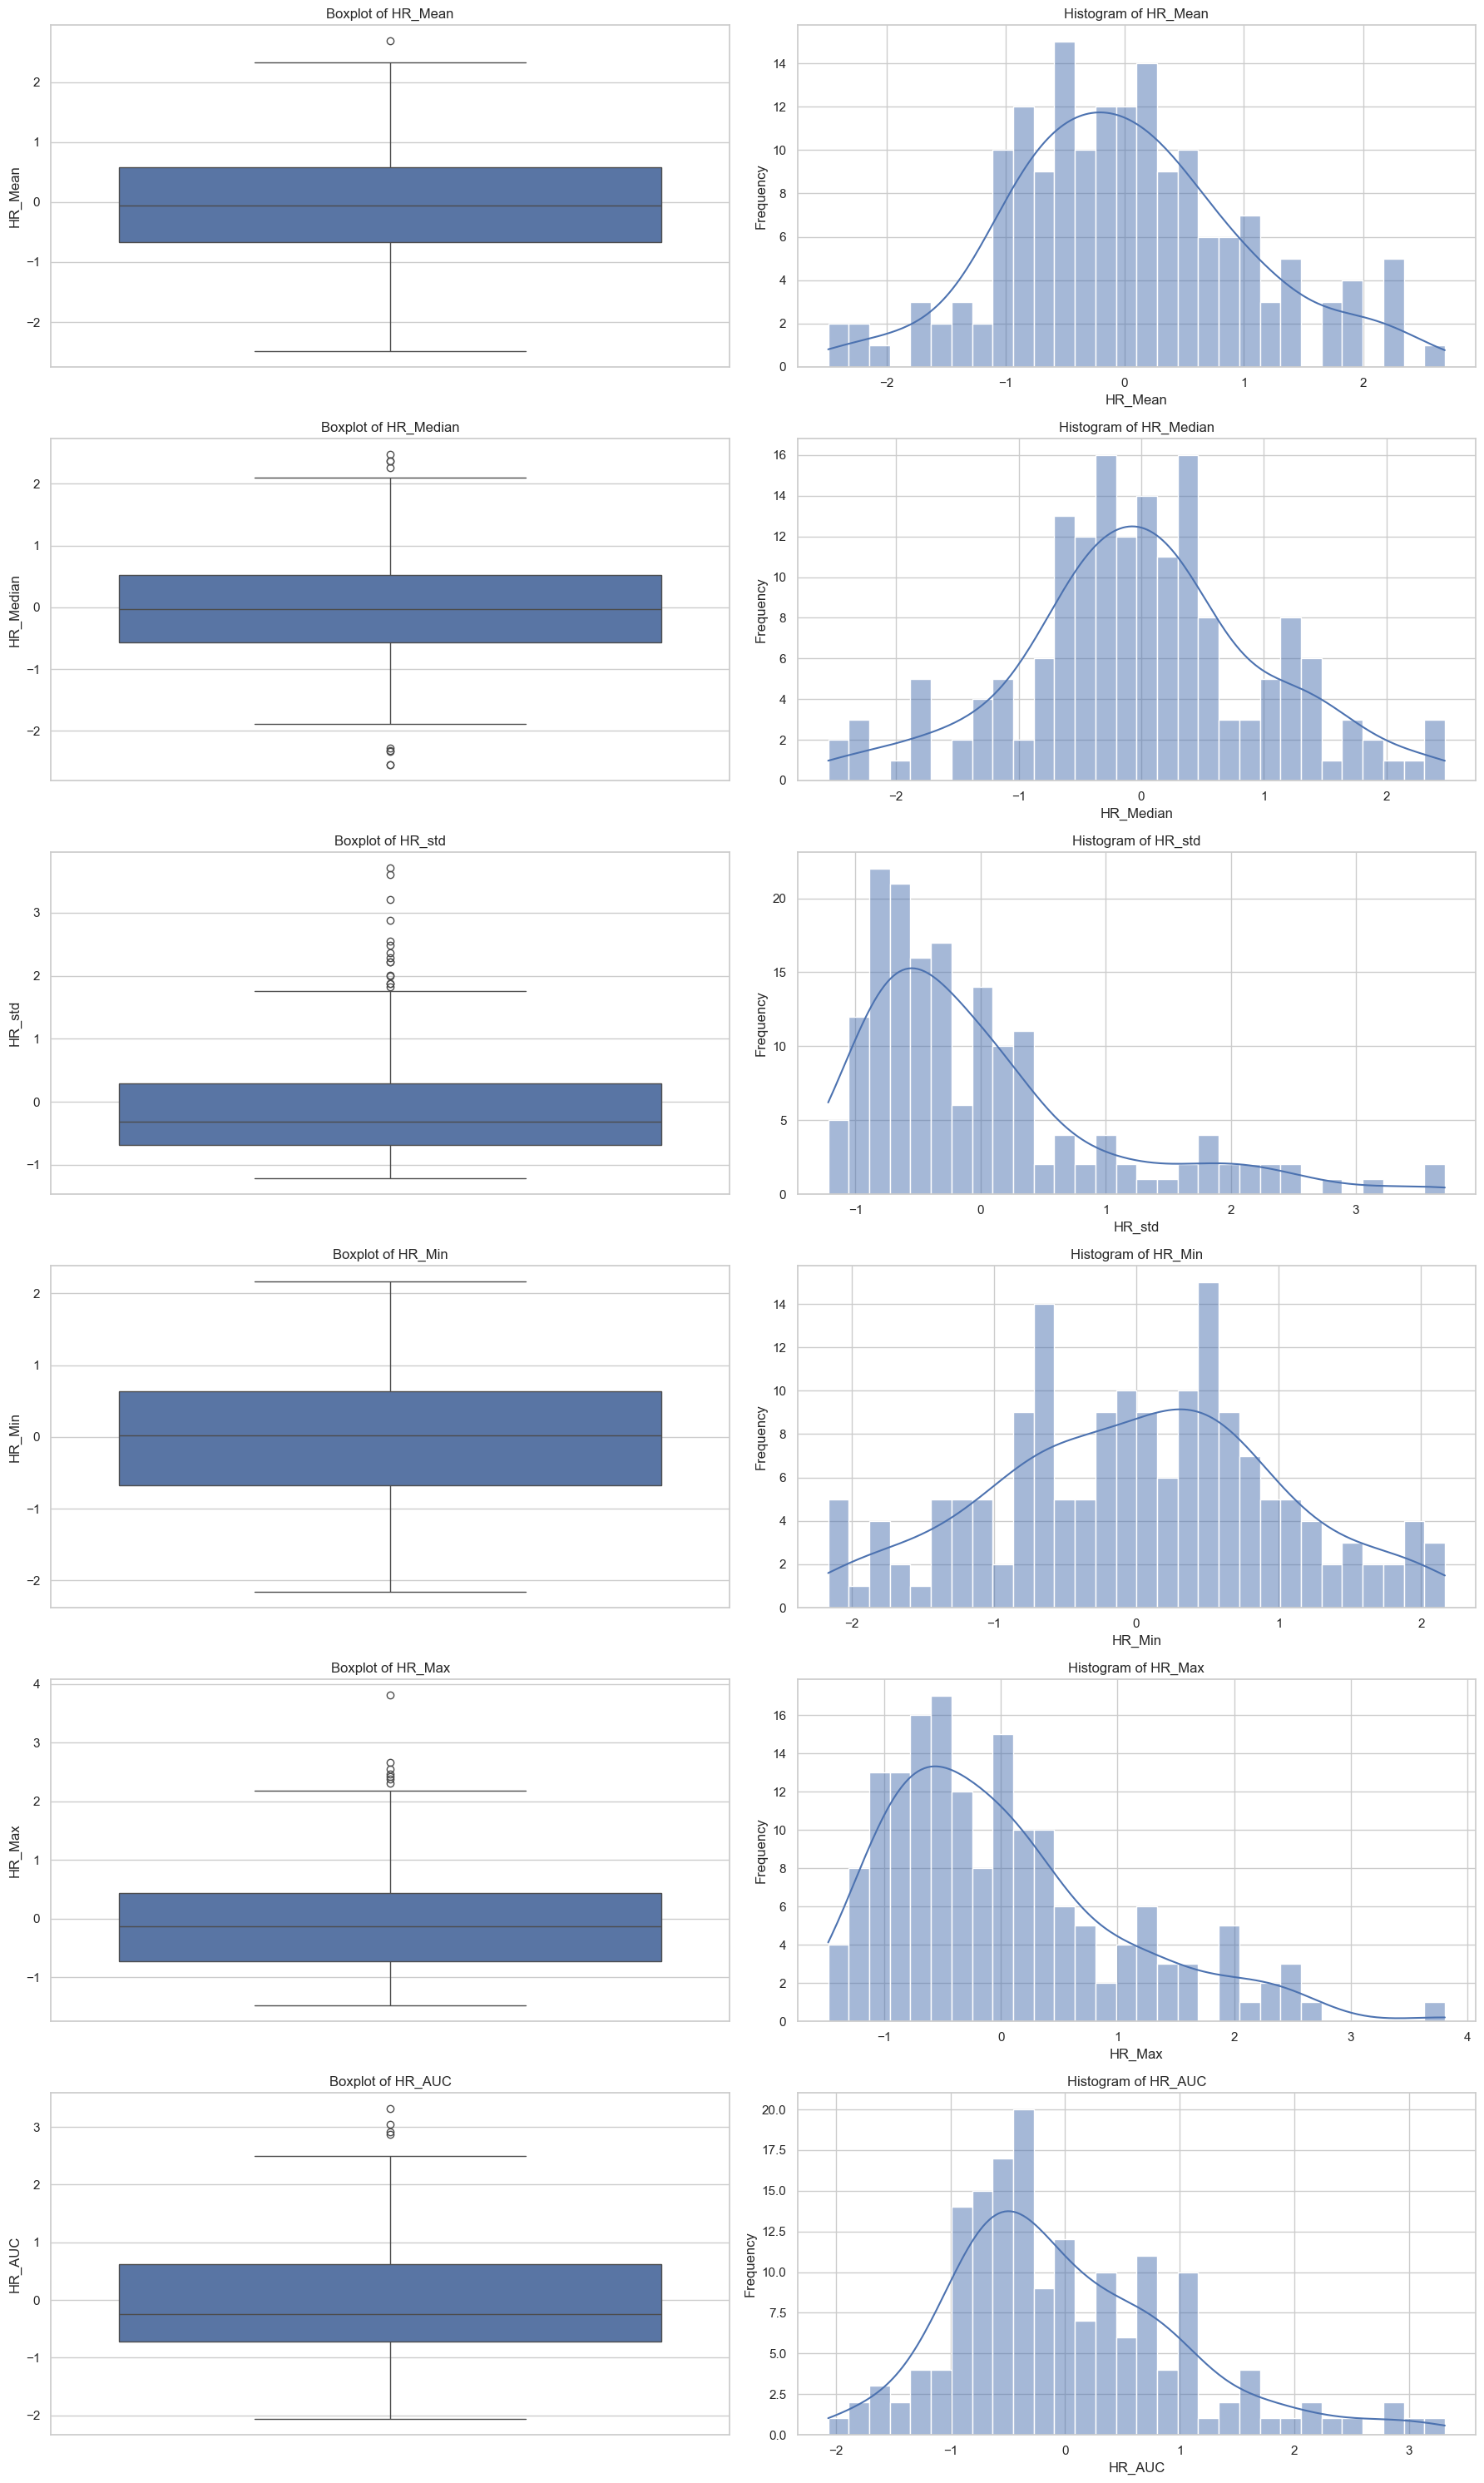

In [ ]:
import numpy as np

HR_metrics_normalized = (HR_metrics - HR_metrics.mean()) / HR_metrics.std()


sns.set(style="whitegrid")


fig, axs = plt.subplots(6, 2, figsize=(18, 30))


for i, column in enumerate(HR_metrics_normalized.columns):

    sns.boxplot(y=HR_metrics_normalized[column], ax=axs[i, 0])
    axs[i, 0].set_title(f'Boxplot of {column}')
    axs[i, 0].set_ylabel(column)
    

    sns.histplot(HR_metrics_normalized[column], bins=30, kde=True, ax=axs[i, 1])
    axs[i, 1].set_title(f'Histogram of {column}')
    axs[i, 1].set_xlabel(column)
    axs[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

X = df_encoded[['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC']].values

# standardize X
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

y = df_encoded['Frustrated'].values

In [ ]:
#0,1,2,3
#4,5,6
#7,8,9,10
print(np.sum(y <= 3))
print(np.sum((y <= 6) & (y >3)))
print(np.sum((y <= 10) & (y >6)))

print(len(y))

121
42
5
168


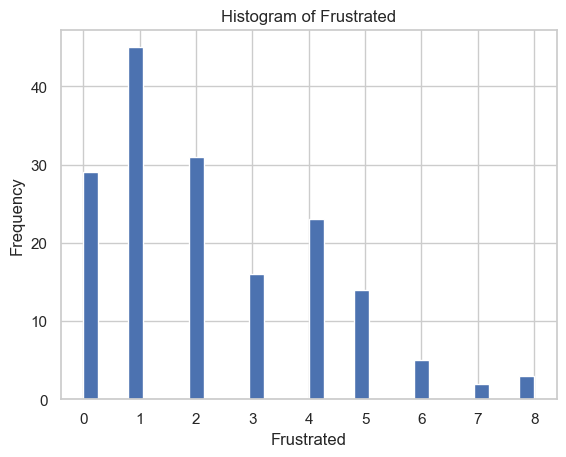

In [ ]:
#plot histogram of y

plt.hist(y, bins=30)
plt.xlabel('Frustrated')
plt.ylabel('Frequency')
plt.title('Histogram of Frustrated')
plt.show()

In [ ]:
def encode_value(x):
    if x in [0, 1]:
        return 0
    elif x in [2,3]:
        return 1
    elif x in [4,5,6,7,8,9,10]:
        return 2

vectorized_encode = np.vectorize(encode_value)


y_encoded = vectorized_encode(y)

In [ ]:
print(np.sum(y_encoded == 0))
print(np.sum(y_encoded == 1))
print(np.sum(y_encoded == 2))

74
47
47


In [ ]:
import sklearn.linear_model as lm
import sklearn.model_selection as ms

accuracies = []

def train_logistic_regression(X, y_encoded, train_index, test_index):
    model = lm.LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
    model.fit(X[train_index], y_encoded[train_index])
    y_test_pred = model.predict(X[test_index])
    return y_test_pred, np.sum((y_test_pred == y_encoded[test_index])) / len(y_encoded[test_index])


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

def train_decision_tree_boost(X, y_encoded, train_index, test_index):
    base_model = DecisionTreeClassifier(max_depth=3)
    model = AdaBoostClassifier(base_model, n_estimators=3)
    model.fit(X[train_index], y_encoded[train_index])
    y_test_pred = model.predict(X[test_index])
    return y_test_pred, accuracy_score(y_encoded[test_index], y_test_pred)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import numpy as np

class NeuralNet(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim=100):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.softmax(x)
        return x

def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=10):
    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * inputs.size(0)

        train_loss = running_train_loss / len(train_loader.dataset)
        train_losses.append(train_loss)

        model.eval()
        running_test_loss = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_test_loss += loss.item() * inputs.size(0)

        test_loss = running_test_loss / len(test_loader.dataset)
        test_losses.append(test_loss)

    return train_losses, test_losses

def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    all_predictions = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_predictions.extend(predicted.cpu().numpy())
    
    accuracy = correct / total
    return accuracy, np.array(all_predictions)

def train_neural_network(X_tensor, y_tensor, train_index, test_index):
    X_train, X_test = X_tensor[train_index], X_tensor[test_index]
    y_train, y_test = y_tensor[train_index], y_tensor[test_index]

    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)

    train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

    input_dim = X_tensor.shape[1]
    output_dim = len(torch.unique(y_tensor))

    model = NeuralNet(input_dim, output_dim, hidden_dim=100)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_loss, test_loss = train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=10)
    
    accuracy, all_predictions = evaluate_model(model, test_loader)

    return all_predictions, accuracy, train_loss, test_loss, 


In [ ]:
import random

def set_seeds(seed=42):
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

LR Average Accuracy: 0.4524
LR Accuracies: [0.47058823529411764, 0.4411764705882353, 0.4411764705882353, 0.45454545454545453, 0.45454545454545453]
DT Average Accuracy: 0.3863
DT Accuracies: [0.5, 0.47058823529411764, 0.29411764705882354, 0.36363636363636365, 0.30303030303030304]
NN Average Accuracy: 0.4706
NN Accuracies: [0.5294117647058824, 0.38235294117647056, 0.4411764705882353, 0.5454545454545454, 0.45454545454545453]


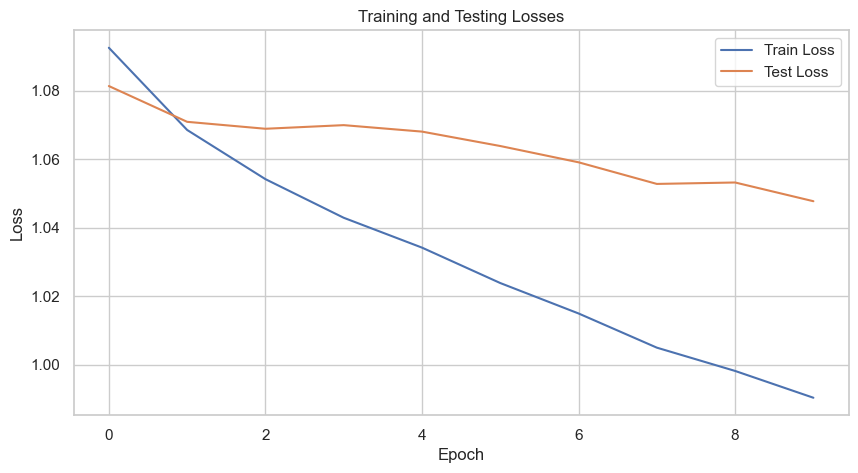

,Fold,Model,Index,Prediction
0,1,ANN,0,0
1,1,ANN,3,0
2,1,ANN,6,0
3,1,ANN,8,0
4,1,ANN,12,0
...,...,...,...,...
499,5,LR,147,2
500,5,LR,155,1
501,5,LR,156,0
502,5,LR,160,0


In [ ]:
import pandas as pd
data = []

set_seeds()

# NN
nn_train_losses = []
nn_test_losses = []
nn_accuracies = []

X_tensor = torch.tensor(X, dtype=torch.float32)
y_encoded = np.concatenate([np.repeat(0, 74), np.repeat(1, 47), np.repeat(2, 47)])
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

# DT
dt_accuracies = []

# LR
lr_accuracies = []

skf = ms.StratifiedKFold(n_splits=5, shuffle=True)

for fold, (train_index, test_index) in enumerate(skf.split(X, y_encoded), 1):
    nn_predictions, nn_accuracy, nn_train_loss, nn_test_loss = train_neural_network(X_tensor, y_tensor, train_index, test_index)

    # NN
    nn_train_losses.append(nn_train_loss)
    nn_test_losses.append(nn_test_loss)
    nn_accuracies.append(nn_accuracy)
    data.extend([(fold, 'ANN', idx, pred) for idx, pred in zip(test_index, nn_predictions)])

    # DT
    dt_predictions, dt_accuracy = train_decision_tree_boost(X, y_encoded, train_index, test_index)
    dt_accuracies.append(dt_accuracy)
    data.extend([(fold, 'DT', idx, pred) for idx, pred in zip(test_index, dt_predictions)])


    # LR
    lr_predictions, lr_accuracy = train_logistic_regression(X, y_encoded, train_index, test_index)
    lr_accuracies.append(lr_accuracy)
    data.extend([(fold, 'LR', idx, pred) for idx, pred in zip(test_index, lr_predictions)])



# LR
lr_average_accuracy = np.mean(lr_accuracies)

print(f'LR Average Accuracy: {lr_average_accuracy:.4f}')

print(f'LR Accuracies: {lr_accuracies}')

# DT
dt_average_accuracy = np.mean(dt_accuracies)

print(f'DT Average Accuracy: {dt_average_accuracy:.4f}')

print(f'DT Accuracies: {dt_accuracies}')

# NN
nn_average_accuracy = np.mean(nn_accuracies)

print(f'NN Average Accuracy: {nn_average_accuracy:.4f}')

print(f'NN Accuracies: {nn_accuracies}')

# Plot train and test losses
avg_train_losses = np.mean(nn_train_losses, axis=0)
avg_test_losses = np.mean(nn_test_losses, axis=0)

plt.figure(figsize=(10, 5))
plt.plot(avg_train_losses, label='Train Loss')
plt.plot(avg_test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Losses')
plt.legend()
plt.show()



# saving data
df = pd.DataFrame(data, columns=['Fold', 'Model', 'Index', 'Prediction'])

df

In [ ]:
# Avg. Accuracy

modelNames = ['ANN', 'DT', 'LR']

for modelName in modelNames:
    print(f"Model: {modelName}")

    y_pred = df[df["Model"] == modelName]["Prediction"]
    y_true = y_encoded[df[df["Model"] == modelName]["Index"].values]

    print("Avg. Accuracy: ", np.sum(y_pred == y_true) / len(y_true))


Model: ANN
Avg. Accuracy:  0.47023809523809523
Model: DT
Avg. Accuracy:  0.3869047619047619
Model: LR
Avg. Accuracy:  0.4523809523809524


In [ ]:
# Avg. Accuracy per fold df2

data2 = []

for modelName in modelNames:
    for fold in df["Fold"].unique():        
        y_pred = df[(df["Model"] == modelName) & (df["Fold"] == fold)]["Prediction"]
        y_true = y_encoded[df[(df["Model"] == modelName) & (df["Fold"] == fold)]["Index"].values]

        accuracy = np.sum(y_pred == y_true) / len(y_true)

        data2.append((modelName, fold, accuracy))

df2 = pd.DataFrame(data2, columns=["Model", "Fold", "Accuracy"])

df2

,Model,Fold,Accuracy
0,ANN,1,0.529412
1,ANN,2,0.382353
2,ANN,3,0.441176
3,ANN,4,0.545455
4,ANN,5,0.454545
5,DT,1,0.500000
6,DT,2,0.470588
7,DT,3,0.294118
8,DT,4,0.363636
9,DT,5,0.303030


In [ ]:
import numpy as np
from scipy import stats

for name in modelNames:
    accuracies = df2[df2["Model"] == name]["Accuracy"]
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies, ddof=1) 
    n = len(accuracies)
    t_critical = stats.t.ppf(0.975, df=n-1)  
    
    confidence_interval = (mean_accuracy - t_critical * std_accuracy / np.sqrt(n), mean_accuracy + t_critical * std_accuracy / np.sqrt(n))

    print(f"Model: {name}")
    print(f"Mean Accuracy: {mean_accuracy:.4f}")
    print(f"Confidence Interval: {confidence_interval}")


Model: ANN
Mean Accuracy: 0.4706
Confidence Interval: (0.3873572323758787, 0.5538192382123566)
Model: DT
Mean Accuracy: 0.3863
Confidence Interval: (0.2685171255212634, 0.5040318940865798)
Model: LR
Mean Accuracy: 0.4524
Confidence Interval: (0.4373015238902532, 0.46751131033434584)


In [ ]:
# two-way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Accuracy ~ C(Model) + C(Fold)', data=df2).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(Model),0.019688,2.0,2.435882,0.149213
C(Fold),0.022212,4.0,1.374096,0.324549
Residual,0.032330,8.0,NaN,NaN


In [ ]:
# Cochrans Q test

# True labels
y_true = y_encoded[df[df["Model"] == "ANN"]["Index"].values]

all_lr_predictions = df[df["Model"] == "LR"]["Prediction"]
all_ann_predictions = df[df["Model"] == "ANN"]["Prediction"]
all_dt_predictions = df[df["Model"] == "DT"]["Prediction"]

lr_predictions_binary = (all_lr_predictions == y_true).astype(int)
dt_predictions_binary = (all_ann_predictions == y_true).astype(int)
nn_predictions_binary = (all_dt_predictions == y_true).astype(int)

data = np.vstack([lr_predictions_binary, dt_predictions_binary, nn_predictions_binary]).T

result = sm.stats.cochrans_q(data)
print(result)


df          2
pvalue      0.15026590756275596
statistic   3.7906976744186047


In [ ]:
# Cochrans Q test

y_true = y_encoded[df[df["Model"] == "ANN"]["Index"].values]

all_lr_predictions = df[df["Model"] == "LR"]["Prediction"]
all_ann_predictions = df[df["Model"] == "ANN"]["Prediction"]
all_dt_predictions = df[df["Model"] == "DT"]["Prediction"]

lr_predictions_binary = (all_lr_predictions == y_true).astype(int)
dt_predictions_binary = (all_ann_predictions == y_true).astype(int)
nn_predictions_binary = (all_dt_predictions == y_true).astype(int)

data = np.vstack([lr_predictions_binary, dt_predictions_binary, nn_predictions_binary]).T

result = sm.stats.cochrans_q(data)
print(result)


df          2
pvalue      0.15026590756275596
statistic   3.7906976744186047


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from statsmodels.stats.contingency_tables import mcnemar


contingency_table_lr_dt = confusion_matrix(lr_predictions_binary, dt_predictions_binary, labels=[1, 0])
contingency_table_lr_nn = confusion_matrix(lr_predictions_binary, nn_predictions_binary, labels=[1, 0])
contingency_table_dt_nn = confusion_matrix(dt_predictions_binary, nn_predictions_binary, labels=[1, 0])

mcnemar_test_lr_dt = mcnemar(contingency_table_lr_dt)
mcnemar_test_lr_nn = mcnemar(contingency_table_lr_nn)
mcnemar_test_dt_nn = mcnemar(contingency_table_dt_nn)

print(f"LR vs DT: p-value = {mcnemar_test_lr_dt.pvalue}")
print(f"LR vs NN: p-value = {mcnemar_test_lr_nn.pvalue}")
print(f"DT vs NN: p-value = {mcnemar_test_dt_nn.pvalue}")

LR vs DT: p-value = 0.7283324808813632
LR vs NN: p-value = 0.241644723140752
DT vs NN: p-value = 0.10885696440971612


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import pandas as pd

precision_lr, recall_lr, _, _ = precision_recall_fscore_support(y_true, all_lr_predictions, average=None, labels=[0, 1, 2])
precision_dt, recall_dt, _,  _ = precision_recall_fscore_support(y_true, all_dt_predictions, average=None, labels=[0, 1, 2])
precision_nn, recall_nn, _, _ = precision_recall_fscore_support(y_true, all_ann_predictions, average=None, labels=[0, 1, 2])

def format_metrics(precision, recall, model_name):
    formatted_metrics = []
    for i, label in enumerate([0, 1, 2]):
        formatted_metrics.append([model_name, label, precision[i], recall[i]])
    return formatted_metrics

all_metrics = []
all_metrics.extend(format_metrics(precision_lr, recall_lr, 'LR'))
all_metrics.extend(format_metrics(precision_dt, recall_dt, 'DT'))
all_metrics.extend(format_metrics(precision_nn, recall_nn, 'NN'))

df_metrics = pd.DataFrame(all_metrics, columns=['Model', 'Class', 'Precision', 'Recall'])

print(df_metrics)


  Model  Class  Precision    Recall
0    LR      0   0.504762  0.716216
1    LR      1   0.358974  0.297872
2    LR      2   0.375000  0.191489
3    DT      0   0.456790  0.500000
4    DT      1   0.297297  0.234043
5    DT      2   0.340000  0.361702
6    NN      0   0.495726  0.783784
7    NN      1   0.454545  0.212766
8    NN      2   0.379310  0.234043


In [ ]:
# TPR, FPR

In [ ]:
# Precision

In [ ]:
# Recall